In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [43]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [44]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [45]:
combined_data = pd.merge(mouse_metadata,study_results, how="outer", on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice.
unique_counts = combined_data["Mouse ID"].unique()

# check for duplicated Timepoint
len(unique_counts)

249

In [47]:
unique_counts = combined_data["Mouse ID"].value_counts()
unique_counts

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [48]:
# to count the values of the unique duplicated value.. and then use value_count to the boolean value
duplicatess = combined_data.duplicated(subset=["Mouse ID","Timepoint"], keep='first')

# since the keep parameter is ‘first’, hence whenever the Timepoint is occurred, the first one is considered Unique and res Duplicate

duplicatess.value_counts()
#combined_data[duplicatess]

False    1888
True        5
dtype: int64

In [49]:
# Show all the data for the duplicate mouse ID using .duplicated()
combined_data[duplicatess]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# To filter rows containing only mouse ID == "g989". using .isin([]) will let us see the duplicates Timepoint
single_ID = combined_data["Mouse ID"].isin(["g989"])
combined_data[single_ID]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [51]:
# create a clean Dataframe by dropping the duplicate mouse by its ID
#Since the duplicated() method returns True for Duplicates, the NOT(~) of the series is taken to see unique value in Data Frame.
clean_dataframe = combined_data[~duplicatess]
clean_dataframe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [52]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_dataframe["Mouse ID"].nunique()
mice_count

249

# Summary Statistics

In [53]:
count_mice = clean_dataframe.groupby('Drug Regimen')['Mouse ID'].count()
count_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean":mean, "Median":median, "Variance":var, "Standard Deviation":std, 
                           "SEM":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# Using the aggregation method, produce the same summary statistics in a single line
clean_dataframe[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').aggregate(['mean', 'median', 'var', 'std', 'sem'])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [56]:
clean_dataframe["Tumor Volume (mm3)"].std()

8.904564978362579

In [57]:
clean_dataframe["Tumor Volume (mm3)"].sem()

0.2049329125626731

# Pie and Bar charts

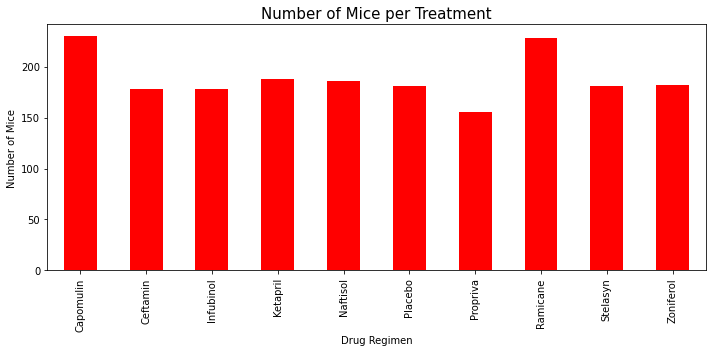

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plotting_value = clean_dataframe.groupby(['Drug Regimen']).count()["Mouse ID"]

plot_bar = plotting_value.plot(kind='bar',figsize=(10,5), color='r',fontsize = 10)

plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)
plt.title("Number of Mice per Treatment",fontsize = 15)

plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

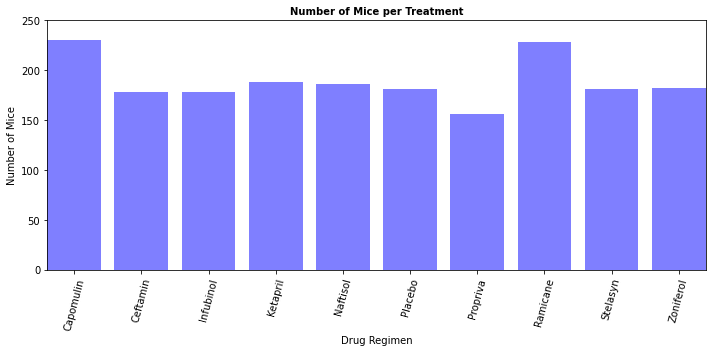

In [59]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = np.arange(len(plotting_value))
y_axis =  plotting_value

label = list(plotting_value.index.values)
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, color ='blue', alpha=0.5, align="center")
plt.xticks(tick_locations,label, rotation="75", fontsize = 10)

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

# Set a Title and labels
plt.title("Number of Mice per Treatment",fontsize=10, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=10)
plt.ylabel("Number of Mice",fontsize=10)
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()